In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
if 0:
    r_3d,m1,m2,x,y,z=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32), unpack=True)
else:
    r_3d,m1,m2,x,y,z=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_IMBH1.dat', usecols=(1,9,10,30,31,32), unpack=True)
    
r_3d0=r_3d[0]
m10=m1[0]
m20=m2[0]
x0=x[0]
y0=y[0]
z0=z[0]

r_3d=r_3d[1:]
m1=m1[1:]
m2=m2[1:]
x=x[1:]
y=y[1:]
z=z[1:]

In [3]:
mges=m1+m2
r0=0.05
step=21
end=100
stepsize=((np.log10(end)-np.log10(r0))/step)
R=np.zeros(step)

r=np.logspace(np.log10(r0),np.log10(end),step+1)
r_i=r[:-1:]
r_a=r[1::]
binwidth=r_a-r_i


In [4]:
M = np.zeros(step)
rho=np.zeros(step)
r_error=binwidth/2

for n in range(step):
    inbin=(r_i[n]<r_3d) * (r_3d<=r_a[n]) #r_3d wird verwendet! creates boolean arrays woth true values if star is in bin distance
    M[n]=np.sum(m1[inbin])+np.sum(m2[inbin]) #mass array with both masses of binary system
    rho[n]=M[n]/((r_a[n]**2-r_i[n]**2)*np.pi) #calculates density of bin
    R[n]=np.mean(r_3d[inbin]) #calculates mean distance of bin
    print(np.sum(inbin))

#extrabin am anfang
M_extra=np.sum(m1[r_3d<r0])+np.sum(m2[r_3d<r0])
rho_extra=M_extra/(r0**2*np.pi)
R_extra=np.mean(r_3d[r_3d<r0])
#einfuegen in bereits angefertigte arrays an erster Stelle
M_final=np.insert(M,0,M_extra)
rho_final=np.insert(rho,0,rho_extra)
R_final=np.insert(R,0,R_extra)


168
251
508
998
1948
3922
7882
16434
32566
59507
96113
137053
166725
168988
141800
99402
60499
29507
2075
91
41


In [7]:
r3d,rho=np.loadtxt('densityfile_IMBH1.txt')
print(r3d,rho)
r_error=binwidth
rho_relerror=-2*r_error/r3d
rho_error=rho_relerror*rho

[  3.48752813e-02   7.21187982e-02   1.06906851e-01   1.54893569e-01
   2.25506330e-01   3.28396490e-01   4.77014345e-01   6.93753471e-01
   1.00664687e+00   1.45865729e+00   2.11074802e+00   3.05415643e+00
   4.41448398e+00   6.37397747e+00   9.19779042e+00   1.32938572e+01
   1.92503838e+01   2.74123017e+01   3.69325999e+01   5.74245724e+01
   8.61238465e+01] [  2.67420654e+05   8.23655408e+04   4.51114085e+04   2.84580933e+04
   1.80708395e+04   1.11611459e+04   6.97123818e+03   4.50125825e+03
   2.84505811e+03   1.58305538e+03   7.74377806e+02   3.24937559e+02
   1.16014803e+02   3.51278091e+01   8.99191508e+00   1.94740577e+00
   3.75510036e-01   5.73788718e-02   1.12642389e-03   1.69946006e-05
   2.58361779e-06]


/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp
/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in power
/home/sophia/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in multiply


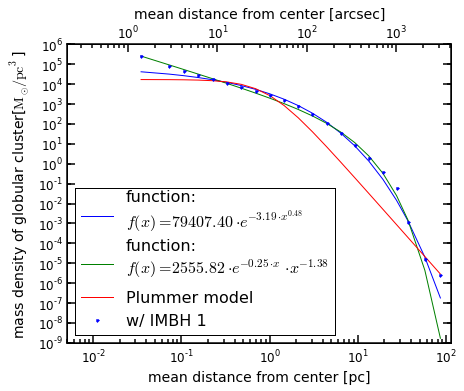

In [20]:
#defining fit function
def func(x,a,b,c):
    return a * np.exp((-b) * (x**c)) 

def func1(x,a,b,c):
    return a * np.exp(-b*x)*x**c

def Plummer(x,a,m):
    return (3*m)/(4*np.pi*(a**3))*(1+(x**2/a**2))**(-5/2)

def isochrones(x,a,b,m):
    return m*((3*(b+a)*(a**2)-(x**2)*(b+3*a))/(4*np.pi*((b+a)**3)*(a**3)))

#trying to optimize functions for given values R_final and Rho_final, know initial values from above
popt,pcov=curve_fit(func,r3d,rho,p0=[12000, 0.5, 0.5],sigma=rho_error[0:])
popt1,pcov1=curve_fit(func1,r3d,rho,sigma=rho_error[0:])
poptP,pcovP=curve_fit(Plummer,r3d,rho,sigma=rho_error[0:])
poptI,pcovI=curve_fit(isochrones,r3d,rho,sigma=rho_error[0:])

#plotting
fig = plt.figure(figsize=(6.5,5.5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.loglog(r3d,func(r3d,*popt),c='r',label='function:\n$f(x)='+'{:.2f}'.format(round(popt[0],1))+'\cdot e^{-'+'{:.2f}'.format(round(popt[1],4))+'\cdot x^{'+'{:.2f}'.format(round(popt[2],4))+'}}$') 
ax1.loglog(r3d,func1(r3d,*popt1),c='g',label='function:\n$f(x)='+'{:.2f}'.format(round(popt1[0],4))+'\cdot e^{-'+'{:.2f}'.format(round(popt1[1],4))+'\cdot x}\cdot x^{'+'{:.2f}'.format(round(popt1[2],4))+'}$')
ax1.loglog(r3d,Plummer(r3d,*poptP),c='k',label='Plummer model')
#ax1.loglog(r3d,isochrones(r3d,*poptI),label='isochrones')
ax1.loglog(r3d,rho,'b.',label='w/ IMBH 1')
ax1.set_xlim(0.005,115)
ax1.set_xlabel('mean distance from center [pc]', fontsize=14)
ax1.set_ylabel('mass density of globular cluster[$\mathrm{M_\odot/pc}^3$]', fontsize=14)
#ax1.grid(True)
ax1.legend(loc=0,prop={'size':16},numpoints=1)

ax2.set_xlim((0.005/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi)) #calculates x limits from parsec to arcsec
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]', fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()
fig.savefig('../Bachelorarbeit-Entwurf/Plots/density_prof_analytic.pdf',format='pdf',bbox_inches='tight')

In [21]:
print(popt)
print(popt1)
print(poptP)

[  7.94073704e+04   3.18611481e+00   4.78085072e-01]
[  2.55582388e+03   2.54368194e-01  -1.37631939e+00]
[  9.54630234e-01   6.22098621e+04]


In [ ]:
mges=np.sum(m1[1:]+m2[1:])

In [ ]:
r_a-r_i

In [ ]:
poptP[1]

In [ ]:
mges